In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
"""From 'Unitary bounds of astrophysical neutrinos' DOI 10.1103/PhysRevD.98.123023"""
import sys
sys.path.extend(['.', '..'])

import numpy as np
import matplotlib as mpl
from matplotlib import rc
rc('text', usetex='True')
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Wedge
from matplotlib.legend_handler import HandlerPatch
plt.style.use('./paper.mplstyle')

mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amssymb}',
    r'\usepackage{accents}',
    r'\DeclareSymbolFont{matha}{OML}{txmi}{m}{it}',
    r'\DeclareMathSymbol{\nu}{\mathord}{matha}{118}']
mpl.rcParams['text.latex.unicode'] = True

import warnings
with warnings.catch_warnings():
    import ternary

    warnings.simplefilter("ignore")
    from utils import fr as fr_utils
    from utils import plot as plot_utils

from unitarity import calc_unitarity_bounds
    
tRed = list(np.array([226,101,95]) / 255.)
tBlue = list(np.array([96,149,201]) / 255.)
tGreen = list(np.array([170,196,109]) / 255.)

In [3]:
f_s_120 = fr_utils.normalise_fr((1, 2, 0))
f_s_010 = fr_utils.normalise_fr((0, 1, 0))
f_s_100 = fr_utils.normalise_fr((1, 0, 0))

In [4]:
n_samples = 360
f_m_120 = calc_unitarity_bounds(f_s_120, n_samples)
f_m_010 = calc_unitarity_bounds(f_s_010, n_samples)
f_m_100 = calc_unitarity_bounds(f_s_100, n_samples)

In [5]:
nbins = 25
fontsize = 23

/home/shivesh/programs/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


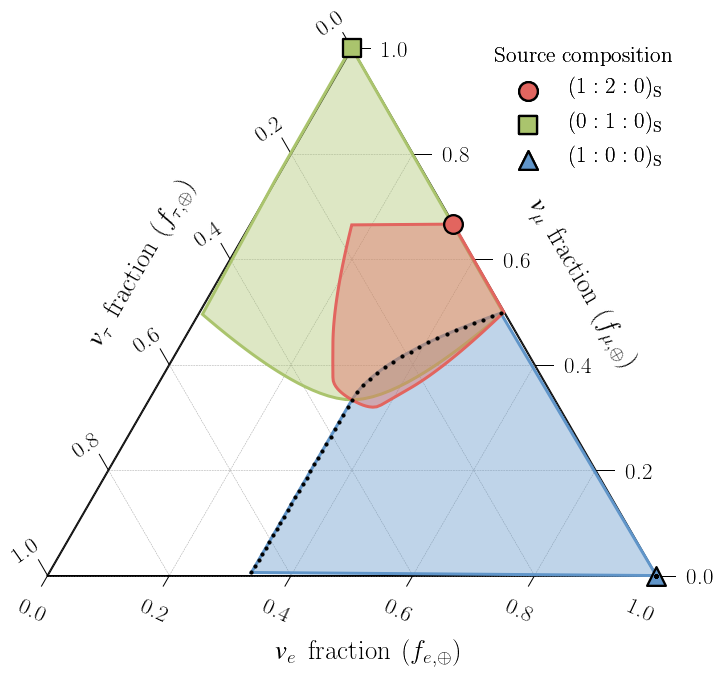

In [6]:
# Figure
fig = plt.figure(figsize=(12, 12))

# Axis
ax = fig.add_subplot(111)
#ax_labels = [r'$f_{e,\oplus}$', r'$f_{\mu,\oplus}$', r'$f_{\tau,\oplus}$']
ax_labels = [r'$\nu_e\:\:{\rm fraction}\:\left( f_{e,\oplus}\right)$',
             r'$\nu_\mu\:\:{\rm fraction}\:\left( f_{\mu,\oplus}\right)$',
             r'$\nu_\tau\:\:{\rm fraction}\:\left( f_{\tau,\oplus}\right)$']
tax = plot_utils.get_tax(ax, scale=nbins, ax_labels=ax_labels, rot_ax_labels=True)

# Plot scatter
tax.scatter([f_s_120*nbins], marker='o', s=350, facecolors=tRed,
            edgecolors='k', linewidth=2.3, zorder=10,
            label=r'$(1:2:0\smash{)_{\rm S}}$')
tax.scatter([f_s_010*nbins], marker='s', s=350, facecolors=tGreen,
            edgecolors='k', linewidth=2.3, zorder=10,
            label=r'$(0:1:0\smash{)_{\rm S}}$')
tax.scatter([f_s_100*nbins], marker='^', s=350, facecolors=tBlue,
            edgecolors='k', linewidth=2.3, zorder=10,
            label=r'$(1:0:0\smash{)_{\rm S}}$')

# Plot fill
for f_m, col in reversed(zip((f_m_120, f_m_010, f_m_100), (tRed, tGreen, tBlue))):
    plot_utils.tax_fill(
        ax=ax,
        points=f_m,
        nbins=nbins,
        linewidth = 3,
        facecolor = col+[0.4],
        edgecolor = col,
        zorder = 4
    )

tax.scatter(f_m_100*nbins, zorder=10, s=10, color='k')
    
# Legend
l_size = fontsize
legend = plt.legend(loc=(0.7, 0.75), title=r'Source composition',
                    fontsize=l_size, prop={'size': fontsize})
plt.setp(legend.get_title(), fontsize=l_size)
ax.add_artist(legend)

#fig.savefig('./plots/unitarity.pdf', bbox_inches='tight', dpi=150)